#### Question 3

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
#Importing the database
ABC_limited = pd.read_csv("data.csv")
ABC_limited.head(5)

,Unnamed: 0,Addthis,Bebo,Blogcatalog,Blogger,Buddymedia,Cnet,Conduit,Customerlobby,Delicious,...,Vimeo,Vocus,Wetpaint,Wordpress,Xanga,Yelp,Yfrog,Youtube,Yuku,Click
0,dmp923122274,0,0,2,0,0,3,6,0,0,...,0,0,0,4,0,0,1,0,1,0
1,dmp458034174,0,3,0,0,0,0,1,0,0,...,0,0,0,12,0,2,2,12,0,0
2,dmp364043571,0,2,0,0,0,0,0,0,2,...,0,0,0,11,0,0,0,0,0,0
3,dmp461339655,0,0,0,0,0,0,0,0,0,...,0,0,0,6,0,0,0,22,0,0
4,dmp549691332,0,0,0,0,0,5,7,0,0,...,0,0,1,0,0,0,1,0,0,0


In [19]:
#Exploring the data. According to this, there aren't outliers.
ABC_limited.describe()

,Addthis,Bebo,Blogcatalog,Blogger,Buddymedia,Cnet,Conduit,Customerlobby,Delicious,Digg,...,Vimeo,Vocus,Wetpaint,Wordpress,Xanga,Yelp,Yfrog,Youtube,Yuku,Click
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.42250,0.78130,0.568100,2.823700,0.0,1.950400,2.142100,0.000200,0.393100,1.012700,...,0.41190,0.040200,0.293600,2.176900,0.459500,0.602200,0.380800,6.040600,0.206600,0.123400
std,1.01405,1.48899,1.197709,5.571438,0.0,2.937619,3.293993,0.014141,0.811319,2.266021,...,1.00436,0.196438,0.612402,3.691879,0.982169,1.194696,0.755413,7.892679,0.588856,0.328912
min,0.00000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,1.00000,0.000000,0.000000,0.0,4.000000,4.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000
max,6.00000,8.00000,7.000000,28.000000,0.0,15.000000,16.000000,1.000000,4.000000,13.000000,...,7.00000,1.000000,3.000000,19.000000,5.000000,7.000000,4.000000,36.000000,4.000000,1.000000


In [20]:
#Looking for null values
ABC_limited.isnull().sum()

Unnamed: 0     0
Addthis        0
Bebo           0
Blogcatalog    0
Blogger        0
              ..
Yelp           0
Yfrog          0
Youtube        0
Yuku           0
Click          0
Length: 83, dtype: int64

In [21]:
#Exploring if another value is different to numbers in the Data. Diggo column has strings
result = ABC_limited.applymap(np.isreal)
result.head(10)

,Unnamed: 0,Addthis,Bebo,Blogcatalog,Blogger,Buddymedia,Cnet,Conduit,Customerlobby,Delicious,...,Vimeo,Vocus,Wetpaint,Wordpress,Xanga,Yelp,Yfrog,Youtube,Yuku,Click
0,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
5,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
6,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
7,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
8,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
9,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [22]:
#Checking the datatypes
ABC_limited.dtypes

Unnamed: 0     object
Addthis         int64
Bebo            int64
Blogcatalog     int64
Blogger         int64
                ...  
Yelp            int64
Yfrog           int64
Youtube         int64
Yuku            int64
Click           int64
Length: 83, dtype: object

In [23]:
#Handling errors in the Dataset
ABC_limited["Diigo"]= ABC_limited["Diigo"].str.replace("Error: value not found", "")
ABC_limited = ABC_limited.mask(ABC_limited == '')
ABC_limited["Diigo"]= ABC_limited["Diigo"].fillna(0)
ABC_limited["Diigo"]= ABC_limited["Diigo"].astype(int)

In [24]:
#Checking point. Now the Diigo Values are numbers.
ABC_limited.head()

,Unnamed: 0,Addthis,Bebo,Blogcatalog,Blogger,Buddymedia,Cnet,Conduit,Customerlobby,Delicious,...,Vimeo,Vocus,Wetpaint,Wordpress,Xanga,Yelp,Yfrog,Youtube,Yuku,Click
0,dmp923122274,0,0,2,0,0,3,6,0,0,...,0,0,0,4,0,0,1,0,1,0
1,dmp458034174,0,3,0,0,0,0,1,0,0,...,0,0,0,12,0,2,2,12,0,0
2,dmp364043571,0,2,0,0,0,0,0,0,2,...,0,0,0,11,0,0,0,0,0,0
3,dmp461339655,0,0,0,0,0,0,0,0,0,...,0,0,0,6,0,0,0,22,0,0
4,dmp549691332,0,0,0,0,0,5,7,0,0,...,0,0,1,0,0,0,1,0,0,0


[Text(0, 0, '8766'), Text(0, 0, '1234')]

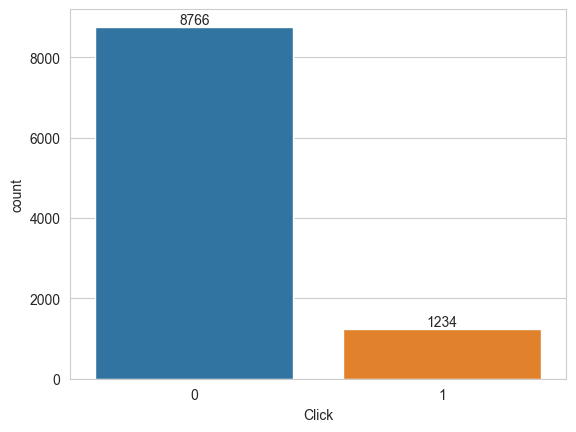

In [25]:
#Insights of the data.
#Of 10,000 users only 1234 of them click the ads.
ax = sns.countplot(x ='Click', data = ABC_limited)
abs_values = ABC_limited['Click'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)

In [26]:
#Selecting the columns for features X and target Y
Y = ABC_limited['Click']
X = ABC_limited.iloc[:, 1:82]

In [27]:
#Creating a Train set (80%) and Test set (20%)
X_train, X_test , Y_train, Y_test = train_test_split(X,Y, test_size=0.20, random_state=42)

In [28]:
#Random Forest Model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest Model Performance:")
print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred_rf))
print("Precision:", precision_score(Y_test, y_pred_rf))
print("Recall:", recall_score(Y_test, y_pred_rf))
print("F1 Score:", f1_score(Y_test, y_pred_rf))
print("Accuracy:", accuracy_score(Y_test, y_pred_rf))


Random Forest Model Performance:
Confusion Matrix:
[[1761    0]
 [ 234    5]]
Precision: 1.0
Recall: 0.02092050209205021
F1 Score: 0.040983606557377046
Accuracy: 0.883


In [29]:
#SVM model classification
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, Y_train)
y_pred_svm = svm_model.predict(X_test)
print("\nSVM Model Performance:")
print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred_svm))
print("Precision:", precision_score(Y_test, y_pred_svm, average='weighted',zero_division=0))
print("Recall:", recall_score(Y_test, y_pred_svm))
print("F1 Score:", f1_score(Y_test, y_pred_svm))
print("Accuracy:", accuracy_score(Y_test, y_pred_svm))


SVM Model Performance:
Confusion Matrix:
[[1733   28]
 [  36  203]]
Precision: 0.9675965534371413
Recall: 0.8493723849372385
F1 Score: 0.8638297872340427
Accuracy: 0.968


In [30]:
# Cross-validation

#Scores for Random Forest model
rf_cv_scores = cross_val_score(rf_model, X, Y, cv=5)
print("\nRandom Forest Model Cross-Validation Scores:", rf_cv_scores)
print("Mean Cross-Validation Score:", rf_cv_scores.mean())

sv_cv_scores = cross_val_score(svm_model, X, Y, cv=5)
print("\nSupport Vector Machine Model Cross-Validation Scores:", sv_cv_scores)
print("Mean Cross-Validation Score:", sv_cv_scores.mean())


Random Forest Model Cross-Validation Scores: [0.8785 0.879  0.879  0.8775 0.8795]
Mean Cross-Validation Score: 0.8786999999999999

Support Vector Machine Model Cross-Validation Scores: [0.9745 0.9715 0.973  0.975  0.9685]
Mean Cross-Validation Score: 0.9724999999999999


In [54]:
def plot_top_predictors(X, y, n=5):

    # Fit linear regression model
    model = LinearRegression().fit(X, y)

    # Get coefficients and feature names
    coef = model.coef_
    feature_names = X.columns.tolist()

    # Sort features by coefficient size
    coef, feature_names = zip(*sorted(zip(coef, feature_names), key=lambda x: abs(x[0]), reverse=True))

    # Get top n features and coefficients
    top_features = feature_names[:n]
    top_coef = coef[:n]

    # Plot bar chart of top n features and coefficients
    fig, ax = plt.subplots(figsize=(7, 4))
    ax.bar(top_features, top_coef)
    ax.set_title(f'Top {n} Predictors')
    ax.set_xlabel('Channels')
    ax.set_ylabel('Coefficient')
    plt.show()

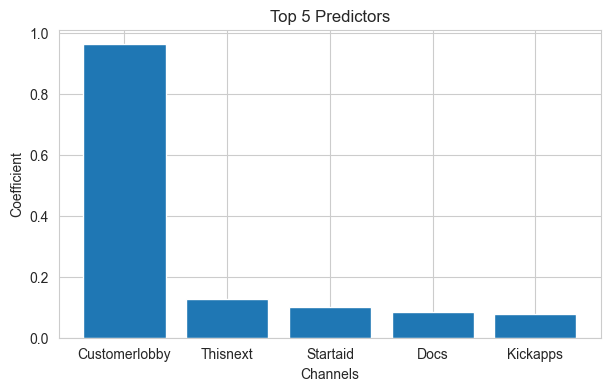

In [55]:
plot_top_predictors(X,Y, n=5)